# ejercicio 7

In [397]:
# configuración para notebook con instalación LOCAL
FUENTES_DIR  = '../Fuentes/'     # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR    = '../Datos/'      # carpeta donde se encuentran los datasets
MODELOS_DIR  = '../Modelos/'    # carpeta donde se encuentran los modelos
ARCHIVOs_DIR = '../Archivos/'   # carpeta recuperar o copiar archivos

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [398]:
import pandas as pd      # para trabajar con archivos de datos csv, excel, etc: https://pandas.pydata.org/docs/getting_started/tutorials.html
import chardet           # para detectar la codificación de texto en archivos

nombre_archivo = DATOS_DIR + 'automobile-simple.csv' # archivo de zoo

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo, encoding=result['encoding'])

# visualiza el dataframe
#print(df)
display(df)

,make,fuel-type,num-of-doors,body-style,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price,volume,eco-rating
0,alfa-romero,gas,two,convertible,2548,130,111.0,21,27,13495.0,528019.904,33.297462
1,alfa-romero,gas,two,convertible,2548,130,111.0,21,27,16500.0,528019.904,33.297462
2,alfa-romero,gas,two,hatchback,2823,152,154.0,19,26,16500.0,587592.640,30.898272
3,audi,gas,four,sedan,2337,109,102.0,24,30,13950.0,634816.956,42.697819
4,audi,gas,four,sedan,2824,136,115.0,18,22,17450.0,636734.832,27.997459
...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,four,sedan,2952,141,114.0,23,28,16845.0,721961.760,38.354298
201,volvo,gas,four,sedan,3049,141,160.0,19,25,19045.0,720913.920,32.043335
202,volvo,gas,four,sedan,3012,173,134.0,18,23,21485.0,721961.760,29.806494
203,volvo,diesel,four,sedan,3217,145,106.0,26,27,22470.0,721961.760,35.073342


Para indicar que cada atributo es Discreto, Continuo, Nominal u Ordinal, vamos a filtrar seleccionando los tipos de variables dentro del dataframe.

In [399]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make          205 non-null    object 
 1   fuel-type     205 non-null    object 
 2   num-of-doors  203 non-null    object 
 3   body-style    205 non-null    object 
 4   curb-weight   205 non-null    int64  
 5   engine-size   205 non-null    int64  
 6   horsepower    203 non-null    float64
 7   city-mpg      205 non-null    int64  
 8   highway-mpg   205 non-null    int64  
 9   price         201 non-null    float64
 10  volume        205 non-null    float64
 11  eco-rating    205 non-null    float64
dtypes: float64(4), int64(4), object(4)
memory usage: 19.3+ KB


In [400]:
#Sabemos que las que tienen Dtype object, pueden ser cualitativas.
cualitativas = df.select_dtypes(include=["object"]).columns
print(cualitativas)

cuantitativas = df.select_dtypes(include=["int64", "float64"]).columns
print(cuantitativas)


Index(['make', 'fuel-type', 'num-of-doors', 'body-style'], dtype='object')
Index(['curb-weight', 'engine-size', 'horsepower', 'city-mpg', 'highway-mpg',
       'price', 'volume', 'eco-rating'],
      dtype='object')


Entonces ahora podemos indicar facilmente cual es cual:

**Cualitativas**
* make -> Nominal
* fuel-type -> Nominal
* num-of-doors -> Ordinal
* body-style -> Nominal

**Cuantitativas**
* curb-weight -> Discreta
* engine-size -> Discreta
* horsepower -> Continua
* city-mpg -> Discreta
* highway-mpg -> Discreta
* price -> Continua
* volume -> Continua
* eco-rating -> Contiunua

Eliminemos los registros con valores faltantes

In [401]:
df.isnull().sum()

make            0
fuel-type       0
num-of-doors    2
body-style      0
curb-weight     0
engine-size     0
horsepower      2
city-mpg        0
highway-mpg     0
price           4
volume          0
eco-rating      0
dtype: int64

In [402]:
df = df.dropna()
df.isnull().sum()

make            0
fuel-type       0
num-of-doors    0
body-style      0
curb-weight     0
engine-size     0
horsepower      0
city-mpg        0
highway-mpg     0
price           0
volume          0
eco-rating      0
dtype: int64

In [403]:
df_numeric = df[cuantitativas] #Me quedo en df_numeric, el dataframe con solo las columnas cuantitativas
df_numeric.corr()

,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price,volume,eco-rating
curb-weight,1.000000,0.848932,0.759925,-0.755559,-0.800113,0.834732,0.822823,-0.842957
engine-size,0.848932,1.000000,0.825286,-0.655737,-0.684662,0.873708,0.592571,-0.723965
horsepower,0.759925,0.825286,1.000000,-0.821960,-0.803658,0.811953,0.449278,-0.839619
city-mpg,-0.755559,-0.655737,-0.821960,1.000000,0.972407,-0.692948,-0.554978,0.976650
highway-mpg,-0.800113,-0.684662,-0.803658,0.972407,1.000000,-0.708659,-0.608072,0.984258
price,0.834732,0.873708,0.811953,-0.692948,-0.708659,1.000000,0.631578,-0.747982
volume,0.822823,0.592571,0.449278,-0.554978,-0.608072,0.631578,1.000000,-0.598520
eco-rating,-0.842957,-0.723965,-0.839619,0.976650,0.984258,-0.747982,-0.598520,1.000000


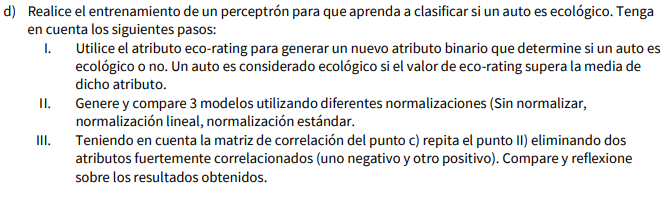

In [404]:
#Media del atributo eco-rating
eco_mean = df.describe().mean()["eco-rating"]

mapeo = {
    "fuel-type": {"gas":1, "diesel":0},
    "num-of-doors": {"four":1, "two":0}
}

df.replace(mapeo, inplace=True)
df2 = pd.get_dummies(df.iloc[:]).astype(int)
display(df2)



C:\Users\ivanb\AppData\Local\Temp\ipykernel_21376\4213626204.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(mapeo, inplace=True)


,fuel-type,num-of-doors,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price,volume,eco-rating,...,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
0,1,0,2548,130,111,21,27,13495,528019,33,...,0,0,0,0,0,1,0,0,0,0
1,1,0,2548,130,111,21,27,16500,528019,33,...,0,0,0,0,0,1,0,0,0,0
2,1,0,2823,152,154,19,26,16500,587592,30,...,0,0,0,0,0,0,0,1,0,0
3,1,1,2337,109,102,24,30,13950,634816,42,...,0,0,0,0,0,0,0,0,1,0
4,1,1,2824,136,115,18,22,17450,636734,27,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,1,2952,141,114,23,28,16845,721961,38,...,0,0,0,0,1,0,0,0,1,0
201,1,1,3049,141,160,19,25,19045,720913,32,...,0,0,0,0,1,0,0,0,1,0
202,1,1,3012,173,134,18,23,21485,721961,29,...,0,0,0,0,1,0,0,0,1,0
203,0,1,3217,145,106,26,27,22470,721961,35,...,0,0,0,0,1,0,0,0,1,0


In [405]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import model_selection,preprocessing

X = np.array(df2.iloc[:,:-1])
Y = np.array((df2["eco-rating"] >= eco_mean))

In [406]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,Y, test_size=0.30, random_state = 42)

In [407]:

    #--- Normalización lineal entre 0 y 1 ---
normalizador1 = preprocessing.MinMaxScaler()

    # Normaliza utilizando la media y el desvio
normalizador2= preprocessing.StandardScaler()
    
    #transformacion de variables con NORMALIZACION LINEAL
X_train_lineal = normalizador1.fit_transform(X_train)
X_test_lineal  = normalizador1.transform(X_test)

    #transformacion de variables con NORMALIZACION ESTANDAR
X_train_estandar = normalizador2.fit_transform(X_train)
X_test_estandar  = normalizador2.transform(X_test)

In [408]:
from ClassPerceptron import Perceptron

ppn1 = Perceptron(alpha=0.01, n_iter=650, random_state=None)
ppn1.fit(X_train_lineal, y_train)

ppn2 = Perceptron(alpha=0.01, n_iter=650, random_state=None)
ppn2.fit(X_train_estandar, y_train)

ppn3 = Perceptron(alpha=0.01, n_iter=650, random_state=None)
ppn3.fit(X_train, y_train)

In [409]:
Y_pred_lineal = ppn1.predict(X_test_lineal)

aciertos = sum(Y_pred_lineal == y_test)

print("aciertos = ", aciertos)
print("%% de aciertos = %.2f %%" % (100*aciertos/X_test.shape[0]))

aciertos =  57
% de aciertos = 95.00 %


In [410]:
Y_pred_estandar = ppn2.predict(X_test_estandar)

aciertos = sum(Y_pred_estandar == y_test)

print("aciertos = ", aciertos)
print("%% de aciertos = %.2f %%" % (100*aciertos/X_test.shape[0]))

aciertos =  58
% de aciertos = 96.67 %


In [411]:
Y_pred = ppn3.predict(X_test)

aciertos = sum(Y_pred == y_test)

print("aciertos = ", aciertos)
print("%% de aciertos = %.2f %%" % (100*aciertos/X_test.shape[0]))

aciertos =  54
% de aciertos = 90.00 %
